In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re


In [ ]:
# This cell will authenticate and mount Drive in the Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


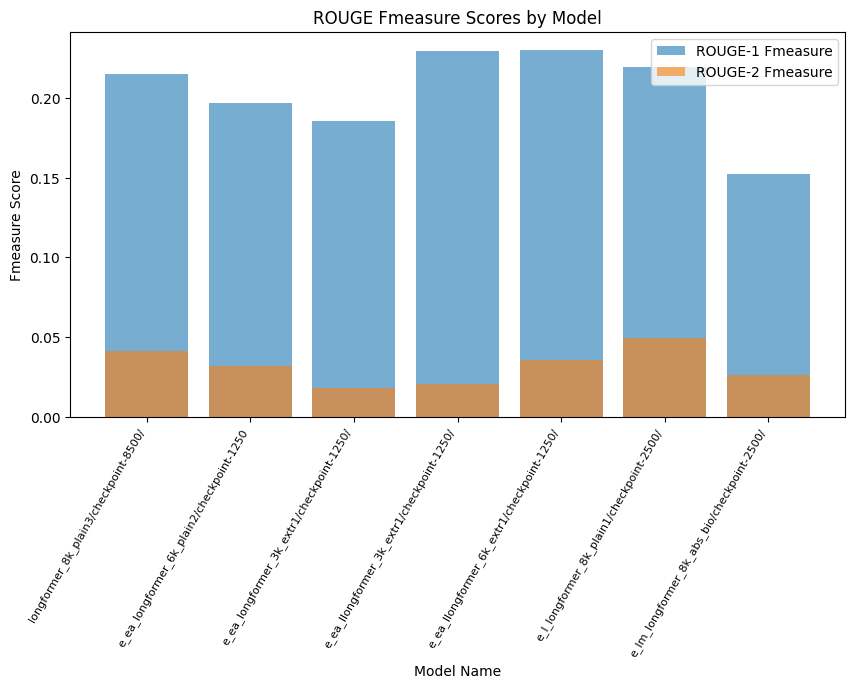

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Assuming the CSV data is saved in a file called 'data.csv'
# Read the CSV data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/W266_NLP/Project2/summarization/LED_multi_model_results.csv')

# Extract fmeasure values for rouge1 and rouge2 from the 'rouge1' column
df['rouge1_fmeasure'] = df['rouge1'].apply(lambda x: float(re.search(r'fmeasure=([0-9.]+)', x).group(1)))
# Assuming rouge2_fmeasure values are provided in another column 'rouge2'
df['rouge2_fmeasure'] = df['rouge2'].apply(lambda x: float(re.search(r'fmeasure=([0-9.]+)', x).group(1)))

# Plotting
plt.figure(figsize=(10, 5))

# Create a bar plot for rouge1_fmeasure
plt.bar(df['name'], df['rouge1_fmeasure'], label='ROUGE-1 Fmeasure', alpha=0.6)

# Create a bar plot for rouge2_fmeasure on top of the previous bar plot
plt.bar(df['name'], df['rouge2_fmeasure'], label='ROUGE-2 Fmeasure', alpha=0.6)

# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Fmeasure Score')
plt.title('ROUGE Fmeasure Scores by Model')
plt.xticks(rotation=60, fontsize=8, ha='right')  # Rotate x-axis labels to 60 degrees with a smaller font size
plt.legend()

# Show the plot (the following line is commented out because we're not executing the code)
# plt.show()


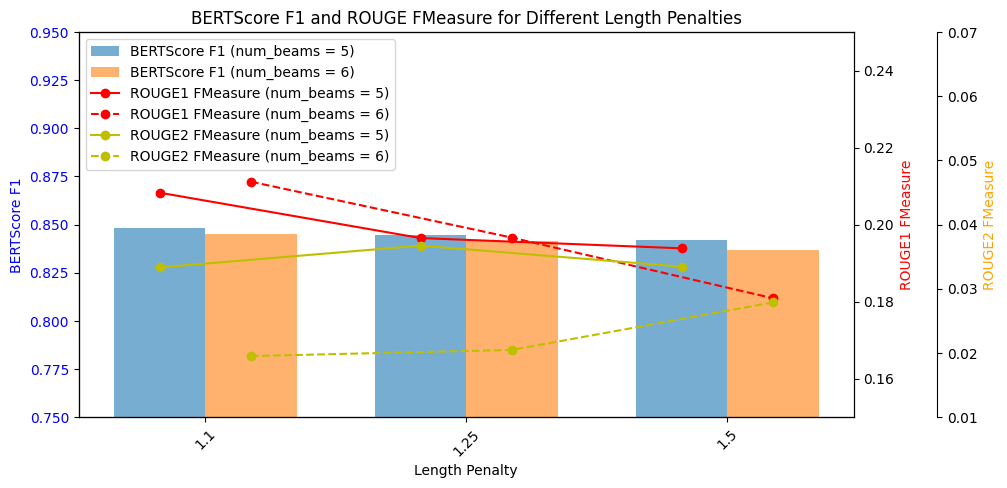

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Read the CSV data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/W266_NLP/Project2/summarization/generation_trials/e_lm_longformer_8k_abstr-2200_bert_score_sweeps.csv')

# Function to extract fmeasure from the rouge scores
def extract_fmeasure(rouge_score):
    return float(re.search('fmeasure=(\d+\.\d+)', rouge_score).group(1))

# Extract bertscore_f1 and rouge fmeasures from the columns
df['bertscore_f1'] = df['bertscore_f1'].astype(float)
df['rouge1_fmeasure'] = df['rouge1'].apply(extract_fmeasure)
df['rouge2_fmeasure'] = df['rouge2'].apply(extract_fmeasure)

# Filter the DataFrame for num_beams = 5 and num_beams = 6
df_5 = df[df['num_beams'] == 5]
df_6 = df[df['num_beams'] == 6]

# Create a new figure for the combined plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set the y-axis limit for bertscore_f1
ax1.set_ylim(0.75, 0.95)

# Define the width of the bars
bar_width = 0.35

# Calculate positions for the bars
positions = range(len(df_5['length_penalty'].unique()))

# Plot bertscore_f1 for num_beams = 5 and num_beams = 6
ax1.bar(positions, df_5['bertscore_f1'], width=bar_width, label='BERTScore F1 (num_beams = 5)', alpha=0.6)
ax1.bar([p + bar_width for p in positions], df_6['bertscore_f1'], width=bar_width, label='BERTScore F1 (num_beams = 6)', alpha=0.6)

# Set labels and title for the first y-axis
ax1.set_xlabel('Length Penalty')
ax1.set_ylabel('BERTScore F1', color='blue')
ax1.set_title('BERTScore F1 and ROUGE FMeasure for Different Length Penalties')
ax1.set_xticks([p + bar_width / 2 for p in positions])
ax1.set_xticklabels(df_5['length_penalty'].unique())
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for rouge1_fmeasure
ax2 = ax1.twinx()

# Set the y-axis limits for rouge1_fmeasure
ax2.set_ylim(0.15, 0.25)
ax2.set_ylabel('ROUGE1 FMeasure', color='red')

# Create a third y-axis for rouge2_fmeasure
ax3 = ax1.twinx()

# Set the y-axis limits for rouge2_fmeasure
ax3.set_ylim(0.01, 0.07)
ax3.set_ylabel('ROUGE2 FMeasure', color='orange')

# Offset the right spine of ax3. The ticks and label have already been
# placed on the right by twinx above.
ax3.spines['right'].set_position(('outward', 60))

# Plot connected scatter plot for rouge1_fmeasure and rouge2_fmeasure for num_beams = 5 and num_beams = 6
ax2.plot(positions, df_5['rouge1_fmeasure'], 'ro-', label='ROUGE1 FMeasure (num_beams = 5)')
ax2.plot([p + bar_width for p in positions], df_6['rouge1_fmeasure'], 'ro--', label='ROUGE1 FMeasure (num_beams = 6)')
ax3.plot(positions, df_5['rouge2_fmeasure'], 'yo-', label='ROUGE2 FMeasure (num_beams = 5)')
ax3.plot([p + bar_width for p in positions], df_6['rouge2_fmeasure'], 'yo--', label='ROUGE2 FMeasure (num_beams = 6)')

# Add legend for the second and third y-axis
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Adjust the x-axis labels with a rotation of 45 degrees
ax1.tick_params(axis='x', labelrotation=45)

# Show the plot (the following line is commented out because we're not executing the code)
# plt.show()
